# Visualization of data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
file_name = r'data/data.csv'
df = pd.read_csv(file_name, engine='python')
df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']] /= 1000
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165.34920,136.89780,471.78410,New York,192.26183
1,162.59770,151.37759,443.89853,California,191.79206
2,153.44151,101.14555,407.93454,Florida,191.05039
3,144.37241,118.67185,383.19962,New York,182.90199
4,142.10734,91.39177,366.16842,Florida,166.18794


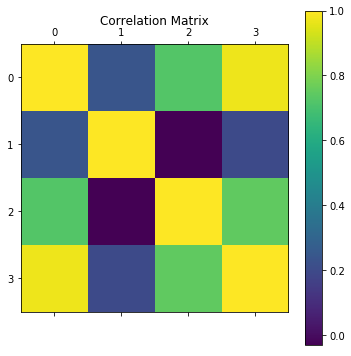

In [3]:
fig = plt.figure(figsize=(6, 6))

plt.matshow(df.corr(), fignum=fig.number)
cb = plt.colorbar()
plt.title('Correlation Matrix')

plt.show()

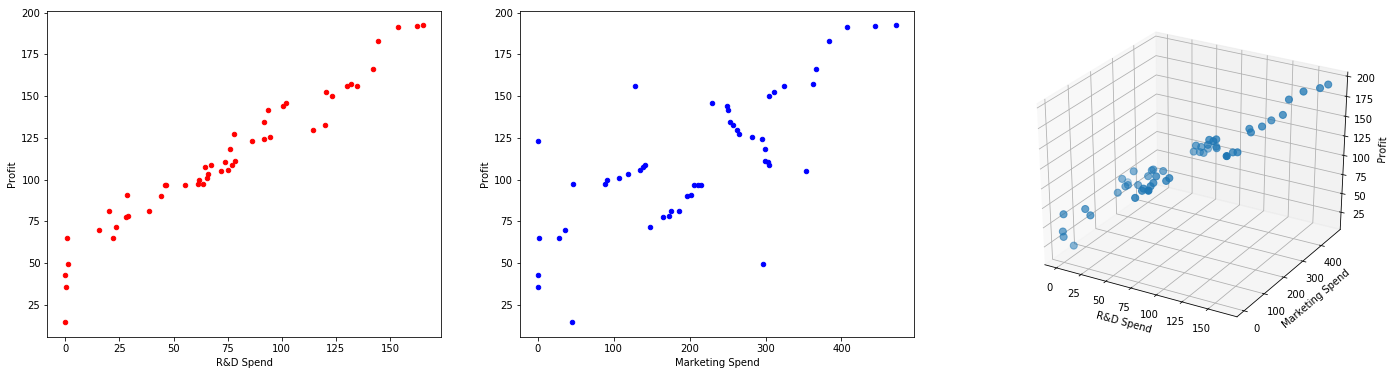

In [4]:
fig = plt.figure(figsize=(24, 6))

ax = fig.add_subplot(131)
ax.scatter(df['R&D Spend'], df['Profit'], c='r', s=20, marker='o')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Profit')

ax = fig.add_subplot(132)
ax.scatter(df['Marketing Spend'], df['Profit'], c='b', s=20, marker='o')
ax.set_xlabel('Marketing Spend')
ax.set_ylabel('Profit')

ax = fig.add_subplot(133, projection='3d')
ax.scatter(df['R&D Spend'], df['Marketing Spend'], df['Profit'], s=50, marker='o')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Marketing Spend')
ax.set_zlabel('Profit')

plt.show()

# Loss function
\begin{equation}
J(\theta) = \frac{1}{2}\sum_{i=1}^{n} \left(h_{\theta}(x^{i}) - y^{i} \right)^{2}
\end{equation}

In [5]:
def loss(X, y, theta):
    y_hat = np.dot(X, theta)
    J = 0.5*sum(np.power(y-y_hat, 2))
    return J

# Batch gradient descent algorithm
Repeat until convergence:
\begin{equation}
\theta_{j} := \theta_{j} + \alpha \sum_{i=1}^{n}\left(y^{i} - h_{\theta}(x^{i}) \right)x_{j}^{i}
\end{equation}

In [6]:
def batch_gradient_descent(X, y, theta, alpha, tolerance):
    old_theta = []
    iterations = []
    num = 0
    
    while 1:
        num += 1
        if num % 1000 == 0:
            iterations.append(num)
            old_theta.append(theta)
        
        y_hat = np.dot(X, theta)
        new_theta = theta + alpha*np.dot(X.T, y-y_hat) 
        if (abs(new_theta-theta) < tolerance).all():
            break
        theta = new_theta
    
    return theta, iterations, old_theta

[[48.88761212]
 [ 0.85571958]]


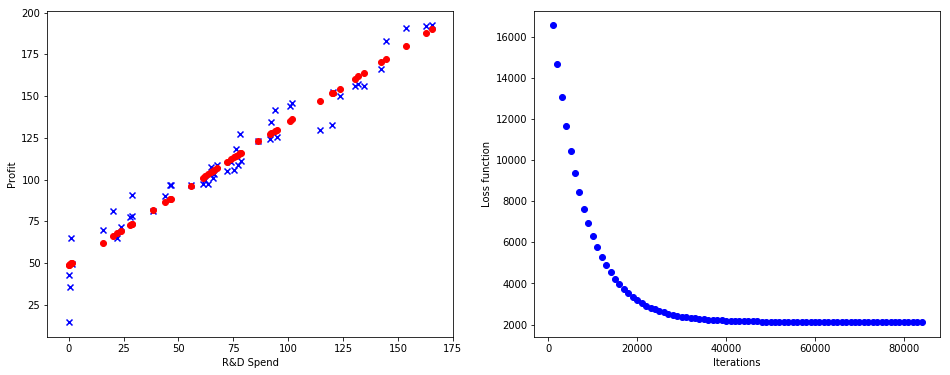

In [7]:
init_theta = np.matrix((0, 0)).T
tolerance = 1e-5
learning_rate = 5e-6

y = np.matrix([df['Profit'].values]).T
x = np.matrix([np.ones(len(y)), df['R&D Spend'].values]).T
theta, iterations, old_theta = batch_gradient_descent(x, y, init_theta, learning_rate, tolerance)
pred = np.dot(x, theta)
print(theta)

J = np.zeros(len(old_theta))
for i, value in enumerate(old_theta):
    J[i] = loss(x, y, value)

fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(121)
ax.scatter([x[:, 1]], [y], c='b', marker='x')
ax.scatter([x[:, 1]], [pred], c='r', marker='o')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Profit')

ax = fig.add_subplot(122)
ax.plot(iterations, J, 'bo')
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss function')

plt.show()

[[ 0.        ]
 [36.05245436]
 [ 3.76573812]]


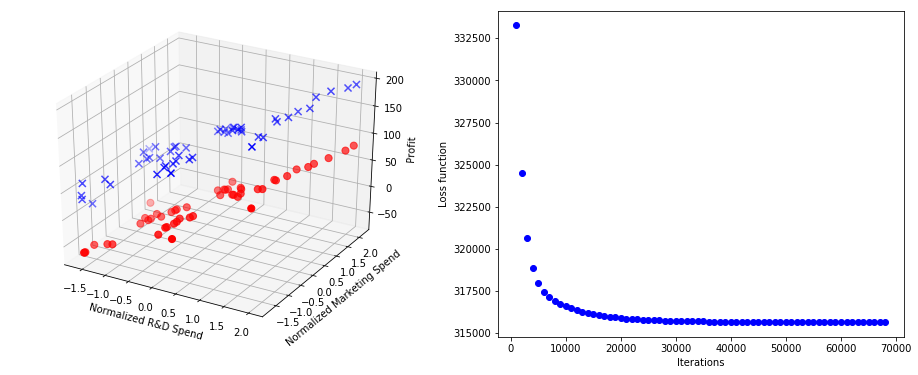

In [8]:
init_theta = np.matrix((0, 0, 0)).T
tolerance = 1e-5
learning_rate = 5e-6

y = np.matrix([df['Profit'].values]).T
x = np.matrix([np.ones(len(y)), df['R&D Spend'].values, df['Marketing Spend'].values]).T
x = StandardScaler().fit_transform(x)
theta, iterations, old_theta = batch_gradient_descent(x, y, init_theta, learning_rate, tolerance)
pred = np.dot(x, theta)
print(theta)

J = np.zeros(len(old_theta))
for i, value in enumerate(old_theta):
    J[i] = loss(x, y, value)

fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(x[:, 1], x[:, 2], y, c='b', s=50, marker='x')
ax.scatter(x[:, 1], x[:, 2], pred, c='r', s=50, marker='o')
ax.set_xlabel('Normalized R&D Spend')
ax.set_ylabel('Normalized Marketing Spend')
ax.set_zlabel('Profit')

ax = fig.add_subplot(122)
ax.plot(iterations, J, 'bo')
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss function')

plt.show()

Batch gradient descent algorithm can't be used to find a global minimum of the loss function. It converges to a local minimum but the predicted values $h_{\theta}(x^{i})$ are far from the real values $y^{i}$. It is necessary to choose other initial coefficients $\theta_{j}$.

# Stochastic gradient descent algorithm
For $i=1$ to $n$:
\begin{equation}
\theta_{j} := \theta_{j} + \alpha\left(y^{i}-h_{\theta}(x^{i}) \right)x_{j}^{i}
\end{equation}

In [9]:
def stochastic_gradient_descent(X, y, theta, alpha, num):
    old_theta = []
    iterations = []
    
    for i in range(num):
        if i % 1000 == 0:
            iterations.append(i)
            old_theta.append(theta)
        
        y_hat = np.dot(X, theta)
        theta = theta - alpha*np.dot(X.T, y_hat-y)
    
    return theta, old_theta, iterations

[[49.08516184]
 [ 0.85377762]]


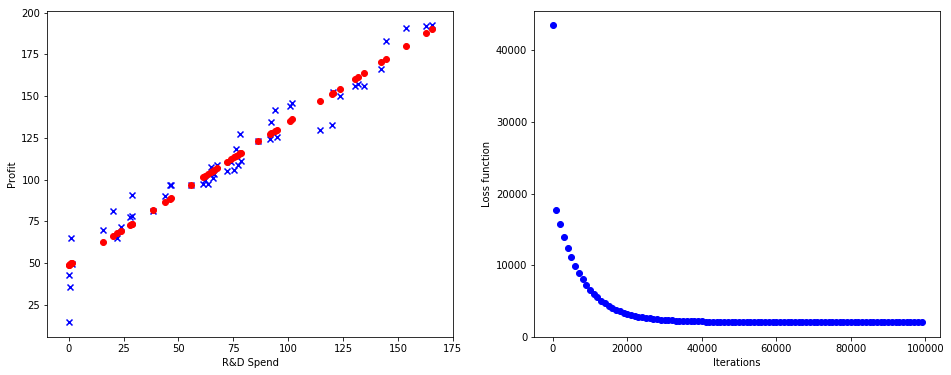

In [10]:
init_theta = np.matrix((100, 0)).T
learning_rate = 5e-6
num = 100000

y = np.matrix(df['Profit'].values).T
x = np.matrix([np.ones(len(y)), df['R&D Spend'].values]).T
theta, old_theta, iterations = stochastic_gradient_descent(x, y, init_theta, learning_rate, num)
pred = np.dot(x, theta)
print(theta)

J = np.zeros(len(old_theta))
for i, value in enumerate(old_theta):
    J[i] = loss(x, y, value)

fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(121)
ax.scatter([x[:,1]], [y], c='b', marker='x')
ax.scatter([x[:,1]], [pred], c='r', marker='o')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Profit')

ax = fig.add_subplot(122)
ax.plot(iterations, J, 'bo')
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss function')

plt.show()

[[ 0.        ]
 [36.18099484]
 [ 3.63719764]]


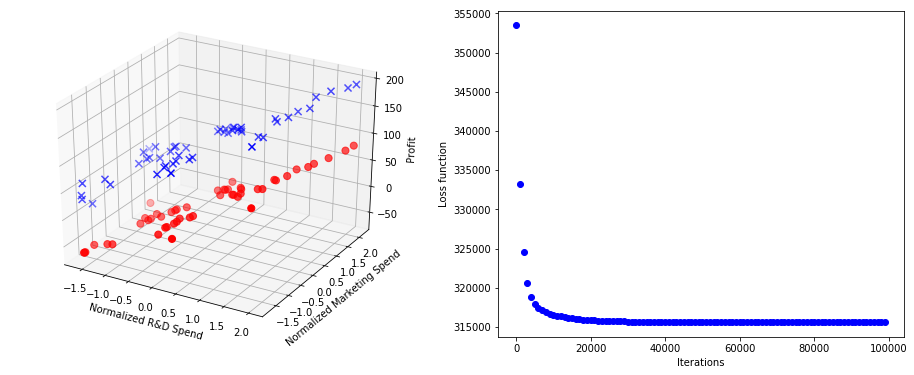

In [11]:
init_theta = np.matrix((0, 0, 0)).T
learning_rate = 5e-6
num = 100000

y = np.matrix([df['Profit'].values]).T
x = np.matrix([np.ones(len(y)), df['R&D Spend'].values, df['Marketing Spend'].values]).T
x = StandardScaler().fit_transform(x)
theta, old_theta, iterations = stochastic_gradient_descent(x, y, init_theta, learning_rate, num)
pred = np.dot(x, theta)
print(theta)

J = np.zeros(len(old_theta))
for i, value in enumerate(old_theta):
    J[i] = loss(x, y, value)

fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(x[:, 1], x[:, 2], y, c='b', s=50, marker='x')
ax.scatter(x[:, 1], x[:, 2], pred, c='r', s=50, marker='o')
ax.set_xlabel('Normalized R&D Spend')
ax.set_ylabel('Normalized Marketing Spend')
ax.set_zlabel('Profit')


ax = fig.add_subplot(122)
ax.plot(iterations, J, 'bo')
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss function')

plt.show()

Stochastic gradient descent algorithm can't be used to find a global minimum of the loss function neither.

# Scikit-learn Linear Regression model

Intercept: [49.03289914]
Coefficients: [[0.85429137]]


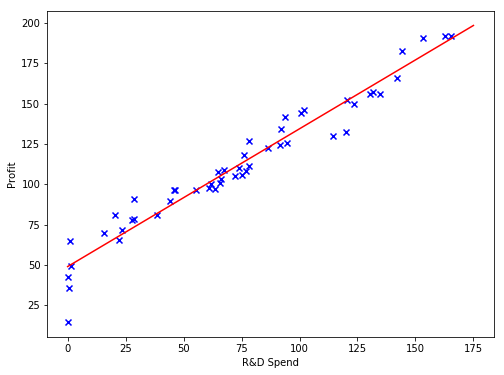

In [12]:
y = np.matrix(df['Profit'].values).T
x = np.matrix([np.ones(len(y)), df['R&D Spend'].values]).T
model = LinearRegression(fit_intercept=True)
model.fit(x[:,1], y)
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

xfit = np.linspace(0, 175, 1000)
yfit = model.predict(xfit.reshape(-1, 1))

fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
ax.scatter([x[:,1]], [y], c='b', marker='x')
ax.plot(xfit, yfit, 'r')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Profit')

plt.show()

Intercept: [112.0126392]
Coefficients: [[36.19750828  3.62068419]]


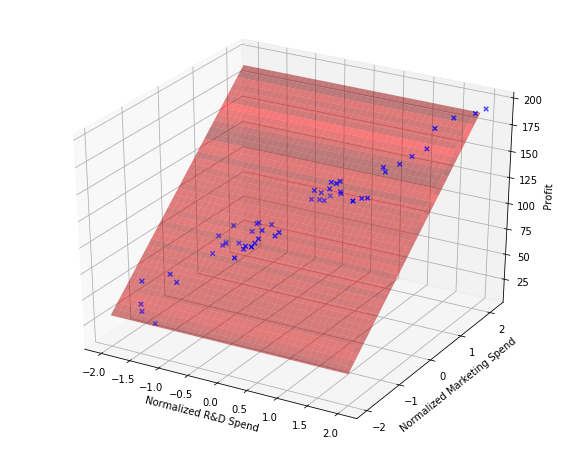

In [13]:
y = np.matrix(df['Profit'].values).T
x = np.matrix([np.ones(len(y)), df['R&D Spend'].values, df['Marketing Spend'].values]).T
x = StandardScaler().fit_transform(x)
model = LinearRegression(fit_intercept=True)
model.fit(x[:,1:], y)
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

xfit_1 = np.linspace(-2, 2, 1000)
xfit_2 = np.linspace(-2, 2, 1000)
xfit = np.column_stack((xfit_1, xfit_2))
yfit = model.predict(xfit)
xfit_1, xfit_2 = np.meshgrid(xfit_1, xfit_2)

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,1], x[:,2], y, c='b', marker='x')
ax.plot_surface(xfit_1, xfit_2, yfit, rstride=25, cstride=25, color='red', alpha=0.5)
ax.set_xlabel('Normalized R&D Spend')
ax.set_ylabel('Normalized Marketing Spend')
ax.set_zlabel('Profit')

plt.show()